Original：https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py


ちょっと変えた

In [1]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10 # 0-9の画像にクラス（分類）するため10
epochs = 20      # 20回学習する

Using TensorFlow backend.


In [2]:
# データのロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("x_train:", x_train.shape) #  60000件の学習用データ、2次元(28 * 28)次元となっている
print("y_train:",y_train.shape) # 60000件の学習用ラベルデータ、0-9が入っている
print("x_test:",x_test.shape)  # 10000件のテスト用データ、2次元(28 * 28)次元となっている
print("y_test:",y_test.shape) # 10000件のテスト用ラベルデータ、0-9が入っている

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# 画像を1次元配列化
# 28 * 28 = 784　配列784の１次元にする
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 0-255までの範囲の値を0-1の範囲の値に変更する
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [5]:
# 正解データを１次元の配列10に置き換える
# ex) 4 : [0][0][0][0][1][0][0][0][0][0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, ':y_train')
print(y_test.shape, ':y_test')

(60000, 10) :y_train
(10000, 10) :y_test


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


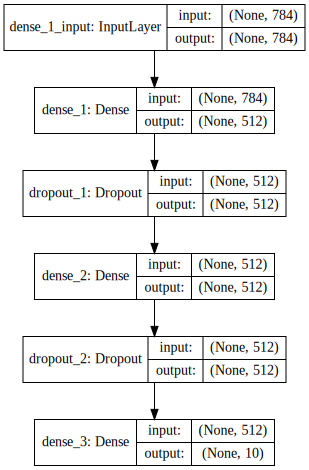

In [6]:
# モデルの構築
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # 入力が784次元、出力が512次元
model.add(Dropout(0.2))                                      # 過学習を防ぐため20%の入力を破棄
model.add(Dense(512, activation='relu'))                     # 出力が512次元 (入力は512次元)
model.add(Dropout(0.2))                                      # 過学習を防ぐため20%の入力を破棄
model.add(Dense(num_classes, activation='softmax'))          # 出力が10次元(判別結果0-9)

model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# モデルの可視化
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model=model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [7]:
# 学習
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=0, verbose=1)
#epochs = 50

history = model.fit(x_train, y_train,                    # 学習用画像データとラベルデータ
                    batch_size=batch_size,
                    epochs=epochs,                       # 学習回数
                    verbose=1,                           # ログ出力 1:出力
                    #callbacks=[early_stopping],            # callback
                    validation_data=(x_test, y_test))    # テスト用画像データ、ラベルデータ

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.9800 - acc: 0.7675 - val_loss: 0.6112 - val_acc: 0.8556
Epoch 2/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.8279 - acc: 0.8372 - val_loss: 1.3133 - val_acc: 0.8067
Epoch 3/20
60000/60000 [==============================] - 16s 268us/step - loss: 1.8205 - acc: 0.8236 - val_loss: 2.1193 - val_acc: 0.8305
Epoch 4/20
60000/60000 [==============================] - 18s 308us/step - loss: 2.8449 - acc: 0.7986 - val_loss: 5.0068 - val_acc: 0.6717
Epoch 5/20
60000/60000 [==============================] - 15s 254us/step - loss: 3.3482 - acc: 0.7791 - val_loss: 2.6347 - val_acc: 0.8279
Epoch 6/20
60000/60000 [==============================] - 15s 244us/step - loss: 3.7974 - acc: 0.7559 - val_loss: 3.2445 - val_acc: 0.7914
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 4.0690 - acc: 0.7427 - val_loss: 2.

In [8]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 114us/step
Test loss: 4.804008652114868
Test accuracy: 0.7014


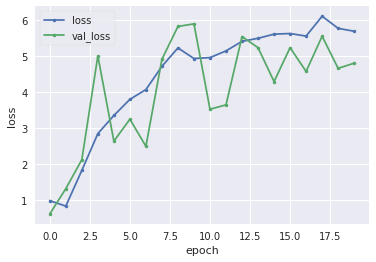

In [9]:
# 結果を可視化
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10, frameon=True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
# ん？